In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\DATA SCIENCE\Python-git-files\dataset\creditcard.csv\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df.shape # (284807, 31)

(284807, 31)

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
for i in df.columns:
    if i != 'Class':
        df['Z_score'] = (df[i] - df[i].mean())/df[i].std()
        df = df[(df['Z_score']>-3) & (df['Z_score']<3)]
        df.drop(columns='Z_score', inplace=True)

In [10]:
df.shape # (207614, 31)

(207614, 31)

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
dfClass = df['Class'].value_counts()

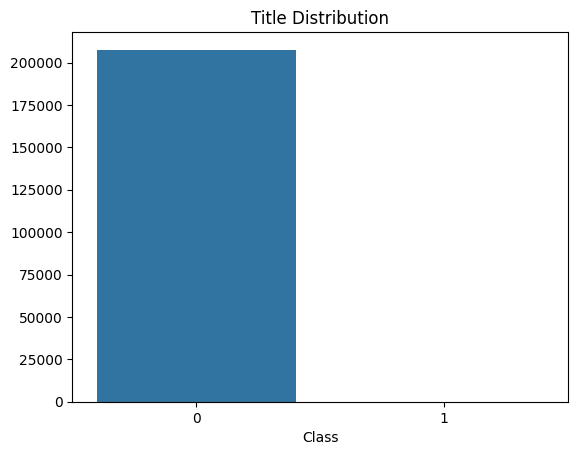

In [14]:
sns.barplot(x=dfClass.index, y=dfClass.values)
plt.title("Title Distribution")
plt.show()

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [16]:
legit = df[df['Class'] == 0]

In [17]:
fraud = df[df['Class'] == 1]

In [18]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,89639.321429,0.685855,0.462760,-0.174008,1.006831,0.373017,-0.349298,0.391604,-0.050194,-0.283605,...,-0.010616,0.018272,-0.070765,0.003962,0.195735,-0.104075,-0.015367,0.003438,49.197500,1.0
std,48748.286656,0.922962,0.669586,1.322525,1.208096,0.779824,0.622717,0.685836,0.213175,0.815659,...,0.190316,0.523154,0.190272,0.514984,0.415760,0.366723,0.098537,0.096297,82.028805,0.0
min,25426.000000,-0.887287,-0.757459,-3.530759,-1.255593,-1.433055,-1.716268,-1.082511,-0.574214,-1.724333,...,-0.448671,-1.014315,-0.370157,-0.946242,-0.724766,-0.531846,-0.297595,-0.331933,0.000000,1.0
25%,48356.250000,-0.156064,0.014555,-0.627838,0.267041,-0.068901,-0.667928,0.030689,-0.171806,-0.783118,...,-0.123932,-0.297730,-0.190429,-0.439295,-0.088361,-0.325740,-0.031367,-0.008595,1.000000,1.0
50%,65543.000000,1.079979,0.540808,-0.274925,0.842227,0.415650,-0.353541,0.307407,-0.006981,-0.235950,...,-0.024655,-0.143384,-0.101302,0.060901,0.335803,-0.198650,0.009073,0.015705,6.335000,1.0
75%,141914.000000,1.235415,1.004110,0.772621,1.876285,0.898645,-0.095317,0.957826,0.118640,0.148801,...,0.122146,0.406631,0.022401,0.419507,0.492628,0.050722,0.033255,0.046554,56.400000,1.0
max,170348.000000,2.132386,1.390002,1.972183,2.882138,1.777386,1.009795,1.438537,0.272897,1.169425,...,0.340331,0.912107,0.484108,0.766853,0.920281,1.246604,0.123185,0.157775,290.180000,1.0


In [19]:
legit.shape

(207586, 31)

In [20]:
fraud.shape

(28, 31)

In [21]:
X = df.drop(columns='Class')

In [22]:
Y = df['Class']

In [23]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [24]:
df.shape

(207614, 31)

In [25]:
x_scaled = StandardScaler().fit_transform(X)

In [26]:
x_scaled

array([[-2.01087592, -1.442804  , -0.17059481, ...,  0.72591622,
        -0.32442541,  1.69592947],
       [-2.01087592,  0.54290013,  0.23254084, ..., -0.17414437,
         0.02980673, -0.69382153],
       [-2.01085473, -1.13655489, -0.30434003, ...,  0.27863401,
         0.49251713,  1.2710993 ],
       ...,
       [ 1.65074968, -0.95485848, -0.14954109, ...,  0.31493928,
        -0.64595548, -0.33437488],
       [ 1.65077087,  1.10920213, -0.44234698, ..., -0.08929259,
        -0.37895817,  0.36646478],
       [ 1.65085564, -0.79970404, -0.30970118, ..., -0.13267287,
         0.01916057,  2.79183515]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.2,random_state=4, stratify=Y)

In [28]:
x_train.shape

(166091, 30)

In [29]:
x_test.shape

(41523, 30)

In [30]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
lr.score(x_test, y_test) # 0.9998651356350184

0.9998555017701033

In [31]:
cm = confusion_matrix(y_test, lr.predict(x_test))

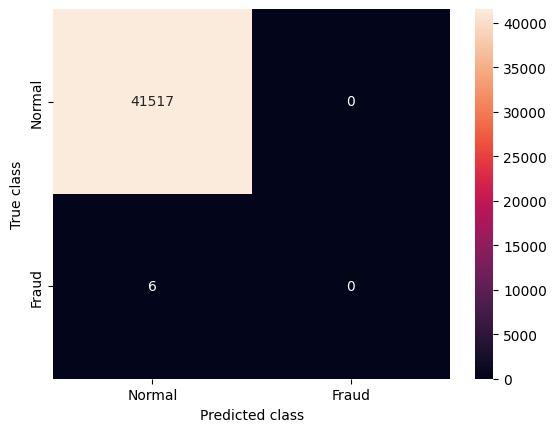

In [32]:
LABELS = ['Normal', 'Fraud']
sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS, fmt='d')
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

In [33]:
log_score = cross_val_score(LogisticRegression(solver='lbfgs'), x_scaled, Y, cv=5)
np.average(log_score) # 0.9998651344054231

0.9998651344054231

In [34]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
svm.score(x_test, y_test) # 0.9998651356350184

0.9998555017701033

In [35]:
svm_score = cross_val_score(SVC(gamma='scale'), x_scaled, Y, cv=5)
np.average(svm_score) # 0.9998651344054231

0.9998651344054231

In [36]:
random = RandomForestClassifier(n_estimators=30)
random.fit(x_train, y_train)
random.score(x_test, y_test)

0.9998555017701033

In [39]:
random_score = cross_val_score(RandomForestClassifier(n_estimators=40), x_scaled, Y, cv=5)

In [40]:
random_score_mean = np.average(random_score)

In [41]:
svm_score_mean = np.average(svm_score) # 0.9998651344054231

In [42]:
log_score_mean = np.average(log_score) # 0.9998651344054231

In [43]:
random_score_mean

0.9998266015441173

In [45]:
dict = {'Model' :['LogisticRegression', 'SVC', 'RandomForestClassifier'],
        'Score': [log_score_mean, svm_score_mean, random_score_mean]}

In [46]:
model = pd.DataFrame(dict)

In [47]:
model

,Model,Score
0,LogisticRegression,0.999865
1,SVC,0.999865
2,RandomForestClassifier,0.999827
